In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.optimize import curve_fit
import csv
from scipy.fftpack import fftfreq

In [4]:
N=int(.16*102300)+1


In [5]:
ts = np.linspace(0, N/102300., N, endpoint=False)


In [6]:
def quadratic(x):
    return x**2,x,1

In [10]:
def integrate(F1,F2,dt):
#F=np.dot(np.transpose(F1),F2)
    S=0
    for i in range(len(F1)):
        S+=F1[i]*F2[i]*dt    
    return S
def integrate1(F,dt):
    #F=np.dot(np.transpose(F1),F2)
    S=0
    for i in F:
        S+=i*dt    
    return S

In [8]:
def U(Fi,Z):#this function was created by Arhangelsiy. It makes Coefficient to lay out the real signal in Basis.
     return integrate(Fi,Z,1./102300)/integrate(Fi,Fi,1./102300)

In [9]:
def SKO(Fi,N0):
    return np.sqrt(N0/(2*integrate(Fi,Fi,1./102300)))

# Линейная функция

# <center>вычисление СКО

In [100]:
def weighted_avg_and_std(values, weights):#функция не моя, взятая на сайте
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [200]:
def painting(ts,Z0,new_signal):
    plt.figure(figsize=(10,10))
    plt.plot(ts, Z0, 'm--')    # маркеры из зеленых треугольников
    plt.plot(ts, a*ts+b, 'b-',linewidth=0.5)   # синяя штриховая
    plt.plot(ts, new_signal, 'ro',markeredgewidth=.02,markersize=0.9)   # красные круглые маркеры, 
    plt.title('№ %d N0 %f real %f %f result %f %f'%(c,N0,a,b,A,B))
    plt.legend(['result',
                    'ideal',
                    'real'],    # список легенды
                    loc='upper left') 

        #plt.subplot(int("22"+str(c)))
        #plt.plot(ts, a*ts+b ,s=.1)
        #plt.scatter(errors,s=.1)
        #plt.plot(errors,"-ro")
        #plt.scatter(ts, Z0 ,s=.1)
    plt.xlabel("real"+str(a)+"result"+str(A))
    plt.yscale('linear')
    plt.title(N0)
    plt.grid()
    plt.savefig("C:\\Users\\Maslovskij\\image\\number=%d N0=%f real %f %f result %f %f.jpeg"%(c,N0,a,b,A,B),format="jpeg",dpi=100)    
    #STDA.append(np.std(statisticsA,ddof=0))
    #STDB.append(np.std(statisticsB,ddof=0))

In [101]:
STDAnormir=[]
STDBnormir=[]
STDCnormir=[]
STDAnot_normir=[]
STDBnot_normir=[]
STDCnot_normir=[]
STDAcur_fit=[]
STDBcur_fit=[]
STDCcur_fit=[]
k=0
while(k<20):
    statisticsA=[]
    statisticsB=[]
    statistics_normA=[]
    statistics_normB=[]
    statistics_curfitA=[]
    statistics_curfitB=[]
    k+=1
    N0=0.01/(k*5)
    #std=np.sqrt(N0*102300/2)
    a=1
    b=2
    c=0
    E=[]
    #plt.figure(figsize=(20,20))
    while (c<100):
        std=np.sqrt(N0*102300/2)
        new_signal=a*ts+b+np.random.normal(0, std,size=len(ts))
        errors=[]
        A=0
        B=1
        K=0
        equivolent=False
        last=0
        while((np.abs(A-a)>=0.0099 or np.abs(B-b)>=0.00005) and K<101and not equivolent):
            Z0=A*ts+B
            Z1=A_norm*ts+B_norm
            Z2=new_signal-Z0
            Z2_norm=new_signal-Z1
            F1=[1]*(len(new_signal))
            F2=ts
            FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)

            fi=[]
            fi=np.append(fi,np.array(F1))
            fi=np.append(fi,F2)
            fi=np.reshape(fi,(2,len(ts)))
            Coefficient=[]
            for i in fi:
                Coefficient=np.append(Coefficient,U(i,Z2))
            fi_norm=[]
            fi_norm=np.append(fi,np.array(F1))
            fi_norm=np.append(fi,FI)
            fi_norm=np.reshape(fi,(2,len(ts)))
            Coefficient_norm=[]
            for i in fi:
                Coefficient=np.append(Coefficient,U(i,Z2_norm))
            A+=Coefficient[1]
            B+=Coefficient[0]
            A_norm+=Coefficient[1]
            B_norm+=Coefficient[0]
            K+=1
            equivolent=np.abs(last-A)<1.2e-6
            last=A
            #print K
            #print K,A,B,Coefficient[1],Coefficient[0]
        statisticsA.append(a-A)
        statisticsB.append(b-B)
        statistics_normA.append(a-A_norm)
        statistics_normB.append(b-B_norm)
        curefit,G=curve_fit(linear,ts,new_signal)

        statistics_curfitA.append(a-curefit[0])
        statistics_curfitB.append(b-curefit[1])
        c+=1
        print(c)
        #plt.show()
    #painting(ts,Z0,new_signal)
    #STDA1.append(weighted_avg_and_std(statisticsA,np.tile(1./len(statisticsA),len(statisticsA)))[1])
    #STDB1.append(weighted_avg_and_std(statisticsB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    STDAnormir.append(weighted_avg_and_std(statistics_normA,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    STDBnormir.append(weighted_avg_and_std(statistics_normB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    #STDCnormir=[]
    STDAnot_normir.append(weighted_avg_and_std(statisticsA,np.tile(1./len(statisticsA),len(statisticsA)))[1])
    STDBnot_normir.append(weighted_avg_and_std(statisticsB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    #STDCnot_normir=[]
    STDAcur_fit.append(weighted_avg_and_std(statistics_curfitA,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    STDBcur_fit.append(weighted_avg_and_std(statistics_curfitB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    #STDCcur_fit=[]
    print k

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
4

In [102]:
ts

array([-0.5       , -0.49993891, -0.49987781, ...,  0.49987781,
        0.49993891,  0.5       ])

In [12]:
def linear(x,a,b):
    return a*x+b

интегрировал от минус т/2 до т/2 результат сходится с курфитом!

In [2]:
a,b=1,2

In [59]:
ts1=np.linspace(-0.5,.5,len(ts))
ts=np.linspace(0,1.,len(ts))
ts=ts1

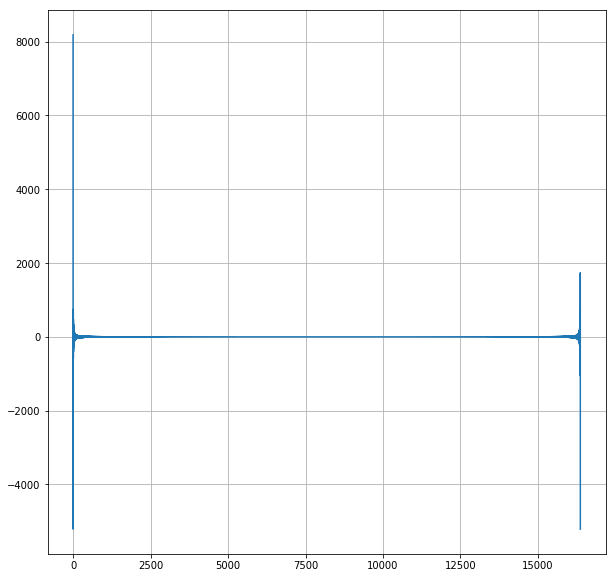

In [92]:
#print len(ts)*3/4.,len(np.array([0]*int(len(ts)/4.)+[1]*int(len(ts)/2.)))
plt.figure(figsize=(10,10))
sinx_devx=fft(np.array([0]*int(len(ts)/4.)+[1]*int(len(ts)/2.)+[0]*int(len(ts)/4.)))
plt.plot((sinx_devx))
plt.grid()
plt.show()

In [95]:
std=np.sqrt(.01*102300/2)
ts1=np.linspace(-0.5,.5,len(ts))

new_signal=a*ts+b+np.random.normal(0, std,size=len(ts))
errors=[]
A=0
B=1
K=0
A_norm=0
B_norm=1

equivolent=False
last=0
while K<2:
    Z0=A*ts+B
    Z1=A_norm*ts+B_norm
    Z2=new_signal-Z0
    Z2_norm=new_signal-Z1
    F1=[1]*(len(new_signal))
    F2=ts
    FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)
    fi=[]
    fi=np.append(fi,np.array(F1))
    fi=np.append(fi,F2)
    fi=np.reshape(fi,(2,len(ts)))
    Coefficient=[]
    for i in fi:
        Coefficient=np.append(Coefficient,U(i,Z2))
    B+=Coefficient[0]   
    A+=Coefficient[1]   
    fi_norm=[]
    fi_norm=np.append(fi_norm,np.array(F1))
    fi_norm=np.append(fi_norm,FI)
    fi_norm=np.reshape(fi,(2,len(ts)))
    Coefficient_norm=[]
    for i in fi_norm:
        Coefficient_norm=np.append(Coefficient_norm,U(i,Z2_norm))
    B_norm+=Coefficient_norm[0]   
    A_norm+=Coefficient_norm[1]   
    K+=1
Coefficient_curve,G=curve_fit(linear,ts,new_signal)


In [96]:
print A_norm,B_norm,A,B,Coefficient_curve

1.2187103802351822 1.5333038391384441 1.2187103802351822 1.5333038391384441 [1.21871055 1.53330384]


In [423]:
print A_norm,B_norm,A,B,Coefficient_curve

0.6721473892929626 2.08765793121271 0.6721473892929626 2.08765793121271 [0.6721474  2.08765793]


In [345]:
b

2

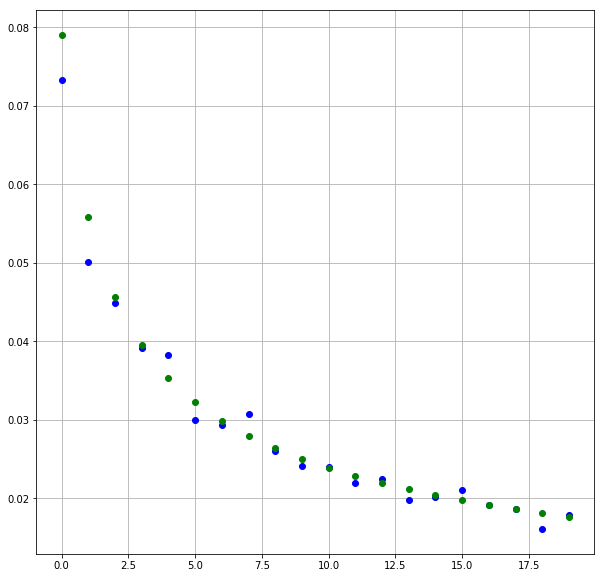

In [115]:
plt.figure(figsize=(10,10))
plt.plot(STDBcur_fit,"bo")
#plt.plot(STDB,"ro")
plt.plot(map(lambda c:SKO(fi[0],c),[ 0.01/((i+1)*5) for i in range(20)]),"go")
plt.grid()
plt.savefig("plot b.jpeg",format="jpeg",dpi=100)    
plt.show()

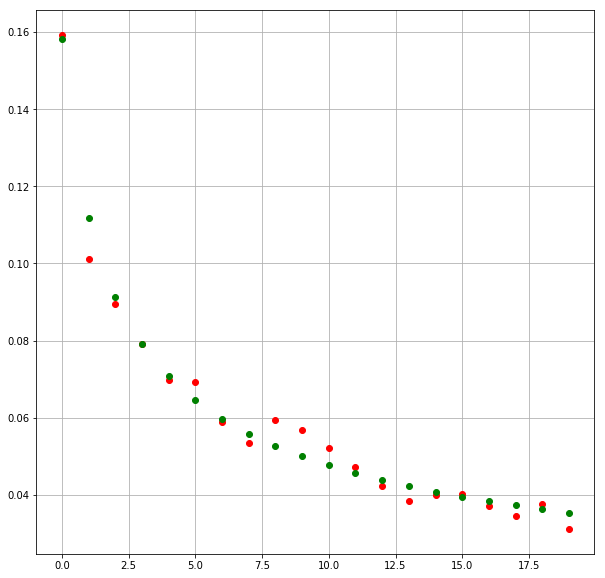

In [314]:
plt.figure(figsize=(10,10))
#plt.plot(STDA1,"bo")
plt.plot(STDB1,"ro")
plt.plot(map(lambda c:2*SKO(fi[0],c),[ 0.01/((i+1)*5) for i in range(20)]),"go")
plt.grid()
plt.savefig("plot b.jpeg",format="jpeg",dpi=100)    
plt.show()

In [231]:
print(np.std(statisticsA,ddof=0),weighted_avg_and_std(statisticsA,np.tile(1./len(statisticsA),len(statisticsA)))[1],SKO(fi[1],0.01/21))

(0.3473624426691593, 0.3473624426691593, 0.4175765567137048)


In [170]:
def STD1(F,E,dx):
    return np.sqrt(np.sum((F-F.mean(axis=0))**2)/(len(F)))

# квадратичная функция вида $$a\cdot X^2+b$$

In [210]:
def painting1(ts,Z0,new_signal,real):
    plt.figure(figsize=(10,10))
    plt.plot(ts, Z0, 'm--')    # маркеры из зеленых треугольников
    plt.plot(ts, real, 'b-',linewidth=0.5)   # синяя штриховая
    plt.plot(ts, new_signal, 'ro',markeredgewidth=.02,markersize=0.9)   # красные круглые маркеры, 
    plt.title('№ %d N0 %f real %f %f result %f %f'%(c,N0,a,b,A,B))
    plt.legend(['result',
                    'ideal',
                    'real'],    # список легенды
                    loc='upper left') 

        #plt.subplot(int("22"+str(c)))
        #plt.plot(ts, a*ts+b ,s=.1)
        #plt.scatter(errors,s=.1)
        #plt.plot(errors,"-ro")
        #plt.scatter(ts, Z0 ,s=.1)
    plt.xlabel("real"+str(a)+"result"+str(A))
    plt.yscale('linear')
    plt.title(N0)
    plt.grid()
    plt.savefig("C:\\Users\\Maslovskij\\image\\number=%d N0=%f real %f %f result %f %f.jpeg"%(c,N0,a,b,A,B),format="jpeg",dpi=100)    
    #STDA.append(np.std(statisticsA,ddof=0))
    #STDB.append(np.std(statisticsB,ddof=0))

In [ ]:
STDA=[]
STDB=[]
k=0
while(k<20):
    statisticsA=[]
    statisticsB=[]
    k+=1
    N0=0.01/(k*5)
    #std=np.sqrt(N0*102300/2)
    a=1
    b=15
    c=0
    E=[]
    #plt.figure(figsize=(20,20))
    while (c<100):
        std=np.sqrt(N0*102300/2)
        new_signal=a*ts**2+b+np.random.normal(0, std,size=len(ts))
        errors=[]
        A=0
        B=1
        K=0
        equivolent=False
        last=0
        while((np.abs(A-a)>=0.0099 or np.abs(B-b)>=0.00005) and K<201and not equivolent):
            Z0=A*ts+B
            Z2=new_signal-Z0
            F1=[1]*(len(new_signal))
            F2=ts
            FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)

            fi=[]
            fi=np.append(fi,np.array(F1))
            fi=np.append(fi,F2)
            fi=np.reshape(fi,(2,len(ts)))
            Coefficient=[]
            for i in fi:
                Coefficient=np.append(Coefficient,U(i,Z2))
            A+=Coefficient[1]
            B+=Coefficient[0]
            K+=1
            equivolent=np.abs(last-A)<1.2e-6
            last=A
            #print K
            #print K,A,B,Coefficient[1],Coefficient[0]
        statisticsA.append(a-A)
        statisticsB.append(b-B)
        c+=1
        print(c)
        #plt.show()
    painting(ts,Z0,new_signal)
    STDA.append(weighted_avg_and_std(statisticsA,np.tile(1./len(statisticsA),len(statisticsA)))[1])
    STDB.append(weighted_avg_and_std(statisticsB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    print k

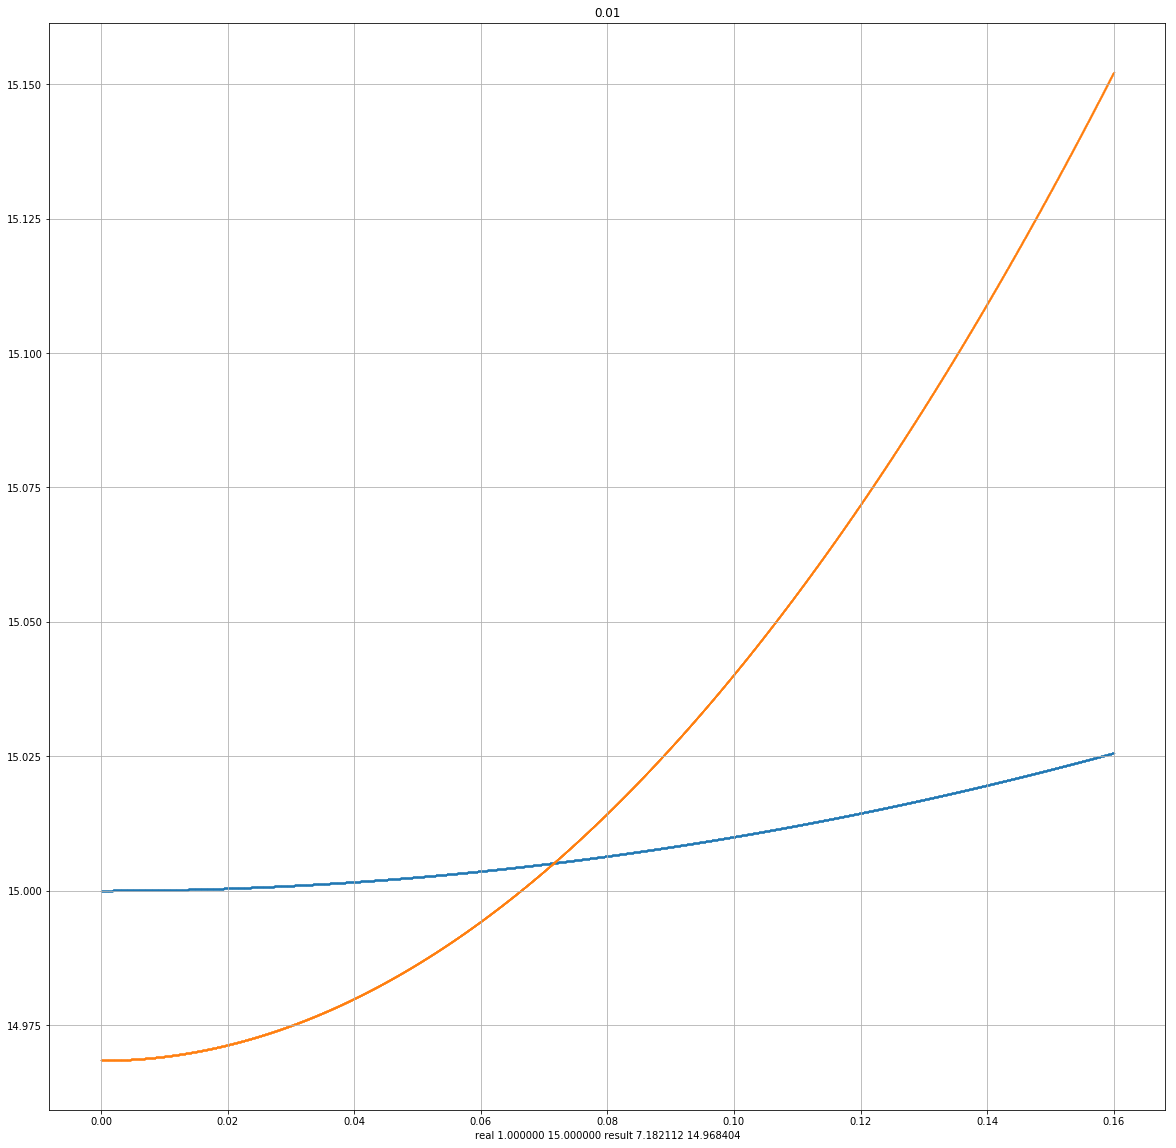

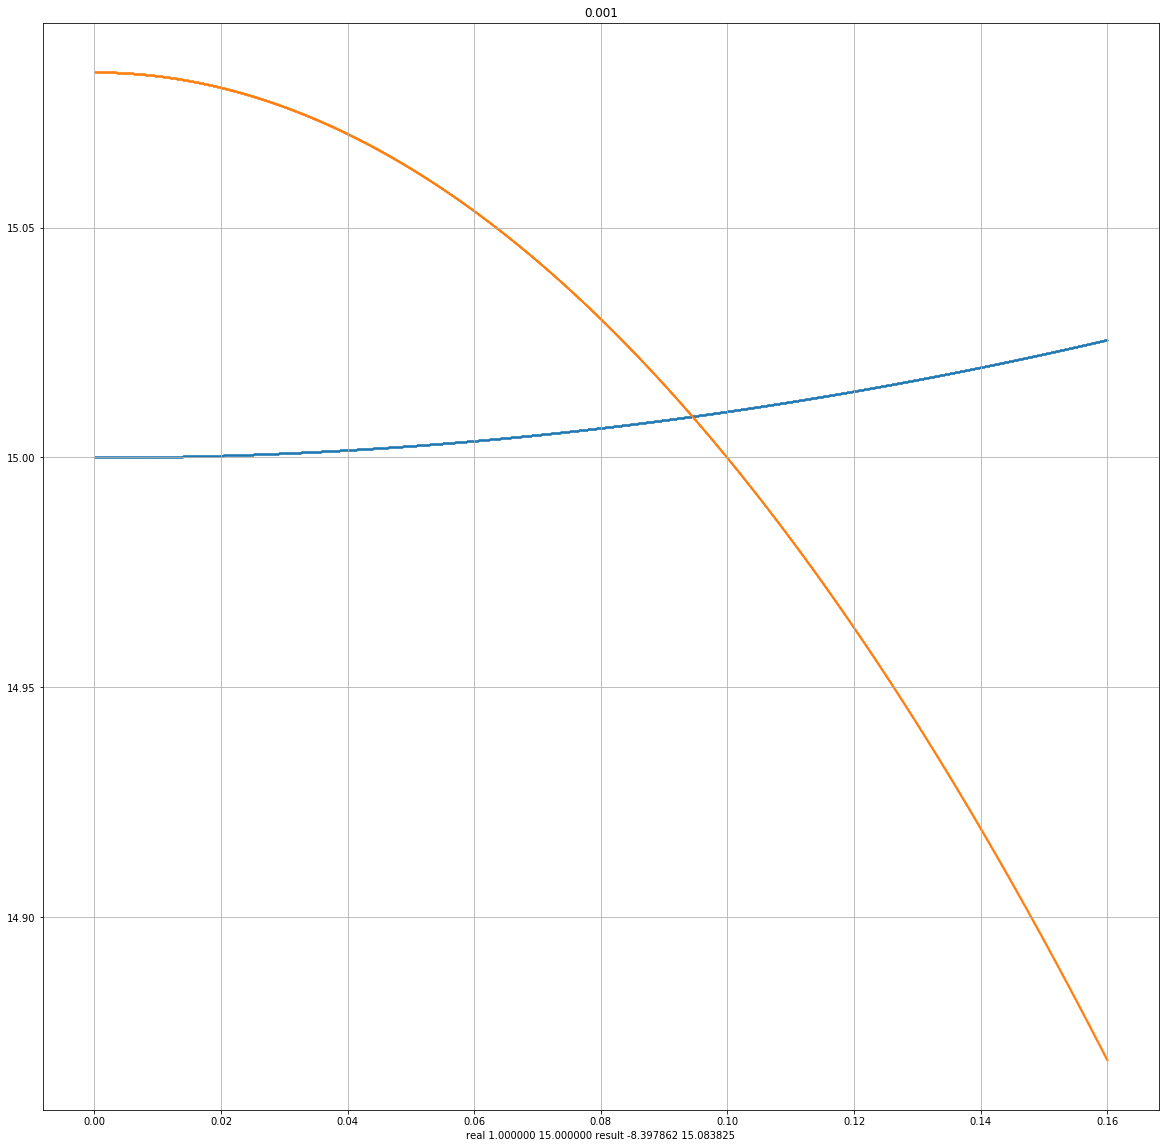

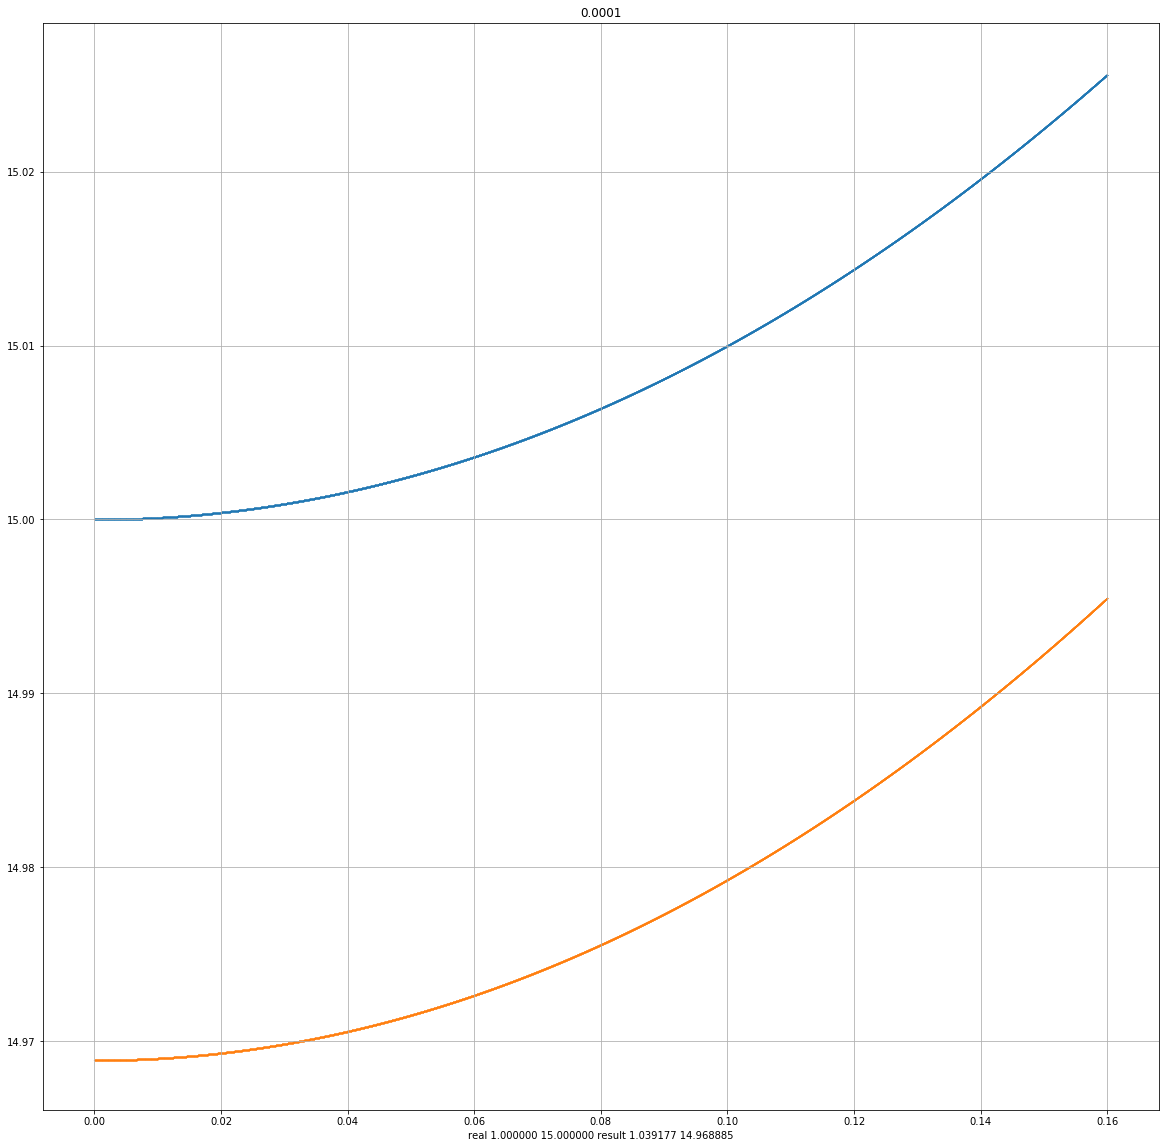

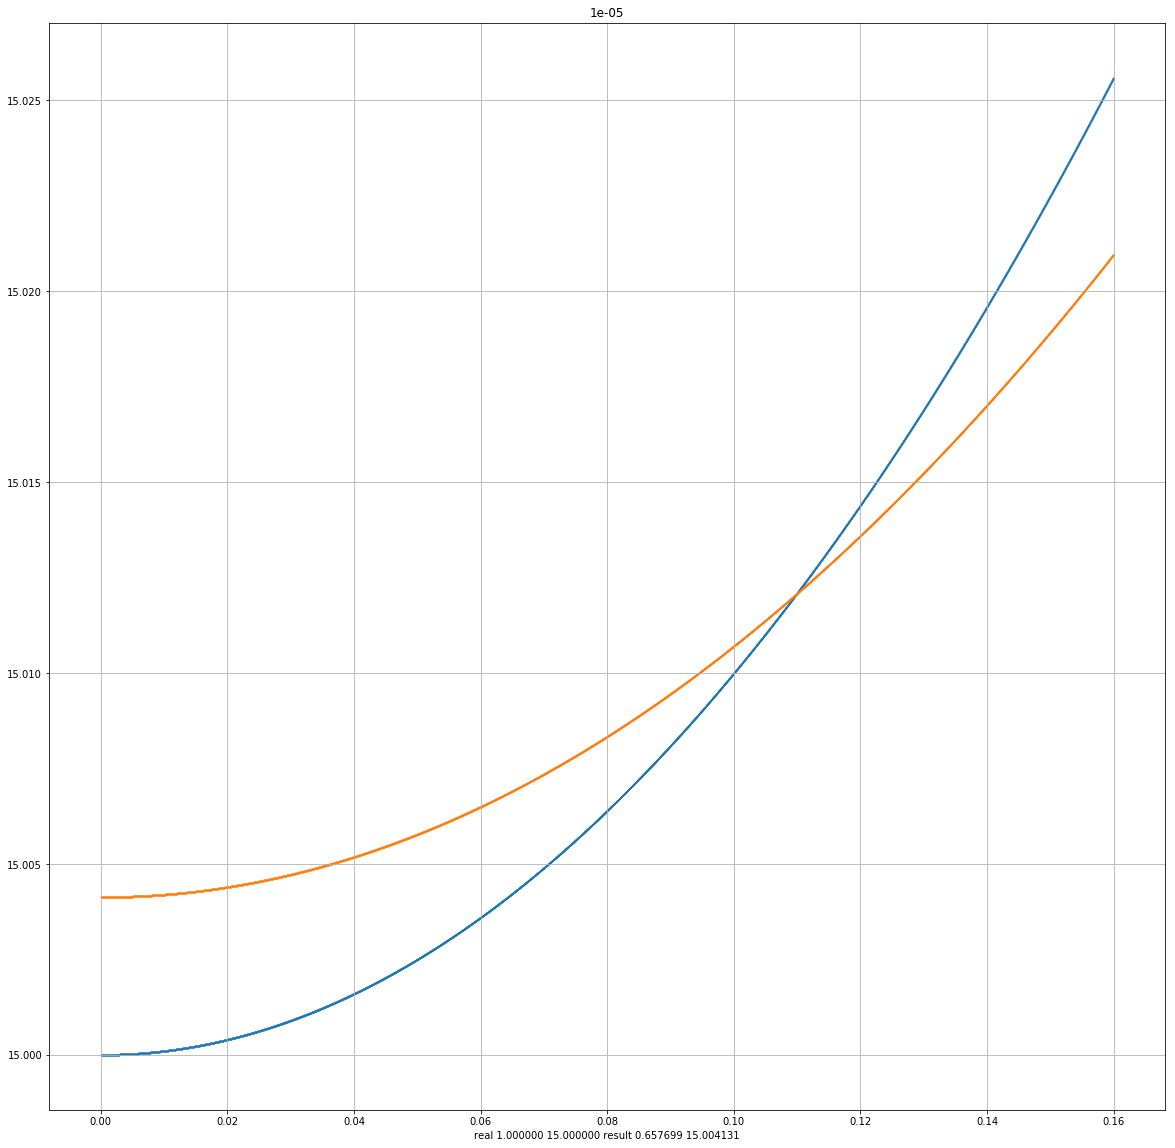

In [153]:
N0=0.01
std=np.sqrt(N0*102300/2)
a=1
b=15
c=0
E=[]
#plt.figure(figsize=(20,20))
while (c<4):
    std=np.sqrt(N0*102300/2)
    new_signal=a*ts**2+b+np.random.normal(0, std,size=len(ts))
    errors=[]
    A=0
    B=1
    K=0
    while((np.abs(A-a)>=0.0099 or np.abs(B-b)>=0.00005) and K<600):
        Z0=A*ts**2+B
        Z2=new_signal-Z0
        F1=[1]*(len(new_signal))
        F2=ts**2
        FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)

        fi=[]
        fi=np.append(fi,np.array(F1))
        fi=np.append(fi,F2)
        fi=np.reshape(fi,(2,len(ts)))
        Coefficient=[]
        for i in fi:
            Coefficient=np.append(Coefficient,U(i,Z2))
        A+=Coefficient[1]
        B+=Coefficient[0]
        K+=1
        errors.append(np.mean((a*ts**2+b-Z0)**2))
        #print K,A,B,Coefficient[1],Coefficient[0]
    c+=1
    plt.figure(figsize=(20,20))
    #plt.subplot(int("22"+str(c)))
    plt.scatter(ts, a*ts**2+b ,s=.1)
    #plt.scatter(errors,s=.1)
    #plt.plot(errors,"-ro")
    plt.scatter(ts, Z0 ,s=.1)
    plt.xlabel("real %f %f result %f %f"%(a,b,A,B))
    E.append(errors)
    plt.yscale('linear')
    plt.title(N0)
    plt.savefig("real %f %f result %f %f.jpeg"%(a,b,A,B),format="jpeg")
    plt.grid()
    plt.show()
    N0/=10
        

In [18]:
N0=0.1
std=np.sqrt(N0*102300/2)
a=1
b=15
new_signal=[b]*len(ts)+np.random.normal(0, std,size=len(ts))
A=0
B=0
K=0
while((np.abs(B-b)>=0.0099) and K<101):
    Z0=[B]*len(ts)
    Z2=np.array(new_signal)-np.array(Z0)
    F1=[1]*(len(new_signal))
    fi=[]
    fi=np.append(fi,np.array(F1))
    Coefficient=[]
    Coefficient=np.append(Coefficient,U(fi,Z2))

    B+=Coefficient[0]
    K+=1
    print K,B,Coefficient[0]

1 15.019018662464639 15.019018662464639
2 15.019018662464356 -2.821434979713535e-13
3 15.019018662464356 -7.929438004614034e-16
4 15.019018662464356 -7.929438004614034e-16
5 15.019018662464356 -7.929438004614034e-16
6 15.019018662464356 -7.929438004614034e-16
7 15.019018662464356 -7.929438004614034e-16
8 15.019018662464356 -7.929438004614034e-16
9 15.019018662464356 -7.929438004614034e-16
10 15.019018662464356 -7.929438004614034e-16
11 15.019018662464356 -7.929438004614034e-16
12 15.019018662464356 -7.929438004614034e-16
13 15.019018662464356 -7.929438004614034e-16
14 15.019018662464356 -7.929438004614034e-16
15 15.019018662464356 -7.929438004614034e-16
16 15.019018662464356 -7.929438004614034e-16
17 15.019018662464356 -7.929438004614034e-16
18 15.019018662464356 -7.929438004614034e-16
19 15.019018662464356 -7.929438004614034e-16
20 15.019018662464356 -7.929438004614034e-16
21 15.019018662464356 -7.929438004614034e-16
22 15.019018662464356 -7.929438004614034e-16
23 15.019018662464356 -

In [131]:
Z0=np.exp(-1j*(2 * np.pi * (carrier_frequency)*ts))
Ampl=Amplitude(A[:N/4+1],Z0[:N/4+1])
P=Phaza([value.imag for value in A],[value.real for value in A],S)
print Ampl,np.abs(spectrum).max()

9.451412034379224 19.472413387206828


# <center>проверка теоретических выводов</center>

In [143]:
N0=0.001
std=np.sqrt(N0*102300/2)
carrier_frequency=1
t0=0.01
new_signal=np.exp(1j*(2 * np.pi * (carrier_frequency)*ts-2 * np.pi*carrier_frequency*t0))#+np.random.normal(0, std,size=len(ts))

Z0=np.exp(1j*(2 * np.pi * (carrier_frequency)*ts))#+np.random.normal(0, std,size=N+1)
spectrum=fft(new_signal)
Max=spectrum[np.where(np.abs(spectrum)==max(np.abs(spectrum)))]
spectrum1=fft(Z0)
Max1=spectrum1[np.where(np.abs(spectrum1)==max(np.abs(spectrum1)))]
print Max,Max1
print -(1./(2*np.pi*carrier_frequency)*np.arctan((Max*Max1.conjugate()).imag/(Max*Max1.conjugate()).real))


[14195.17112088+6679.74049518j] [13747.73581724+7557.88172265j]
[0.01]


# <center>работа с синусоидой</center>

# Поиск фазы и амплитуды

In [232]:
def sinus(x,dw,dp):
    return np.sin(dw*x+dp)

In [233]:
def cosinus(x,dw,dp):
    return np.cos(dw*x+dp)

In [277]:
a=2
carrier_frequency=100
freq=0
Phi=np.pi/8

In [279]:
N0=0.01
std=np.sqrt(N0*102300/2)
new_signal=2*np.exp(1j*(2 * np.pi * (carrier_frequency)*ts+Phi))+np.random.normal(0, std,size=len(ts))

# поиск и уточнение частоты

In [237]:
def quadratic(x):
    return x**2,x,1

In [280]:
spectrum=fft(new_signal)
import operator
index, value = max(enumerate(np.absolute(spectrum)),key=operator.itemgetter(1))

In [281]:
print np.abs(spectrum[index]),value

35458.77426860709 35458.77426860709


In [282]:
frequency=fftfreq(len(ts),1./102300)

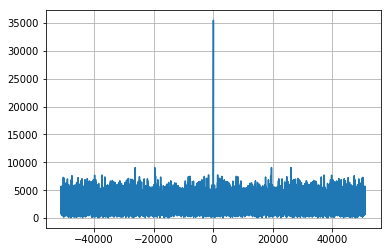

In [283]:
plt.plot(frequency,np.abs(spectrum))
plt.grid()
plt.show()

In [284]:
data= map(lambda c:quadratic(c),(frequency[index-1:index+2]))
data=np.reshape(data,(3,3))
koefficients=np.linalg.solve(data,np.abs(spectrum[index-1:index+2]))

In [285]:
freq=-koefficients[1]/(2*koefficients[0])
print freq

100.03717994902442


In [286]:
frequency[index]

99.99389089131896

In [50]:
N0=0.01
std=np.sqrt(N0*102300/2)
#new_signal=2*np.exp(1j*(2 * np.pi * (carrier_frequency)*ts+np.pi/8))#+np.random.normal(0, std,size=N+1)
Ampl=Amplitude(new_signal,Z0)
print Ampl
P=Phaza([value.imag for value in new_signal],[value.real for value in new_signal],Z0.real)
print P,np.pi/8
Z0=np.exp(-1j*(2 * np.pi * (freq)*ts))

F=freq
K=0
print((np.abs(P1-P)))
while(np.abs(F-(carrier_frequency))>=0.0099and  K<101):
    Z0=np.exp(-1j*((2 * np.pi * F)*ts+P1))
    Z1=(new_signal*Z0)
    Z2=Z1.imag/Ampl
    F1=[1]*(len(Z0))
    F2=ts
    FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)

    fi=[]
    fi=np.append(fi,np.array(F1))
    fi=np.append(fi,FI)
    fi=np.reshape(fi,(2,len(ts)))
    Coefficient=[]
    for i in fi:
        Coefficient=np.append(Coefficient,U(i,Z2))
    if (np.abs(P-np.pi/8)<=0.01):
        F+=Coefficient[1]
        K+=1
    else:
        F+=Coefficient[1]
        P+=Coefficient[0]
        K+=1
    print K,F,P1
    """F1=[1]*(N+1)
F2=ts
FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)"""

    """fi=[]
    fi,G=curve_fit(cosinus,ts,Z2)
    F+=fi[0]
    P1+=fi[1]
    K+=1
    print K"""
    
print (np.abs(F-carrier_frequency), np.abs(P1-P))

2.000000880322909
0.392678273917593 0.392699081699
0.09817477042468103
1 -28534.640997483624 0.945901468355797
2 -28531.452590548663 0.8706724346927589
3 -28532.739287431432 0.6960798971101013
4 -28530.533781802013 0.6753385345850993
5 -28532.55711038147 0.45902004617575143
6 -28530.4021373259 0.43683330935120324
7 -28532.39001929996 0.2238454551845378
8 -28530.26016553748 0.2087900764020631
9 -28532.202879260538 0.005239814317460761
10 -28530.153386201415 0.0009476975444924398
11 -28532.023403023246 -0.18788895102937492
12 -28530.058709204106 -0.17903686315806186
13 -28531.850808003597 -0.35133085863738067
14 -28529.981031267547 -0.32986125112451803
15 -28531.6945443617 -0.48575583857200877
16 -28529.917051656244 -0.453327386556804
17 -28531.558724805178 -0.5943717929912667
18 -28529.86528143437 -0.5530108427248948
19 -28531.44405818881 -0.6812566717792892
20 -28529.82403204766 -0.6328645915204554
21 -28531.3490031539 -0.7503898981711468
22 -28529.791567474087 -0.6965673777121356
23 -

In [ ]:
STDA=[]
STDB=[]
k=0
while(k<20):
    statisticsA=[]
    statisticsB=[]
    k+=1
    N0=0.01/(k*5)
    #std=np.sqrt(N0*102300/2)
    a=1
    b=15
    c=0
    E=[]
    #plt.figure(figsize=(20,20))
    while (c<100):
        std=np.sqrt(N0*102300/2)
        new_signal=a*ts**2+b+np.random.normal(0, std,size=len(ts))
        errors=[]
        A=0
        B=1
        K=0
        equivolent=False
        last=0
        while((np.abs(A-a)>=0.0099 or np.abs(B-b)>=0.00005) and K<201and not equivolent):
            Z0=A*ts+B
            Z2=new_signal-Z0
            F1=[1]*(len(new_signal))
            F2=ts
            FI=F2-(np.dot(F1,F2)/np.dot(F1,F1))*np.array(F1)

            fi=[]
            fi=np.append(fi,np.array(F1))
            fi=np.append(fi,F2)
            fi=np.reshape(fi,(2,len(ts)))
            Coefficient=[]
            for i in fi:
                Coefficient=np.append(Coefficient,U(i,Z2))
            A+=Coefficient[1]
            B+=Coefficient[0]
            K+=1
            equivolent=np.abs(last-A)<1.2e-6
            last=A
            #print K
            #print K,A,B,Coefficient[1],Coefficient[0]
        statisticsA.append(a-A)
        statisticsB.append(b-B)
        c+=1
        print(c)
        #plt.show()
    painting(ts,Z0,new_signal)
    STDA.append(weighted_avg_and_std(statisticsA,np.tile(1./len(statisticsA),len(statisticsA)))[1])
    STDB.append(weighted_avg_and_std(statisticsB,np.tile(1./len(statisticsB),len(statisticsB)))[1])
    print k